# China's 100 Richest

https://www.forbes.com/china-billionaires/list/#tab:overall

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

import requests

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# year data to fetch
year = 2021

url = 'http://www.forbes.com/ajax/list/data'

parameter = {'type': 'person', 'year': 2021, 'uri': 'china-billionaires'}

r = requests.get(url=url, params=parameter)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=UTF-8 -- Encoding: UTF-8


# Append Data

In [4]:
position = []
rank = []
name = []
lastname = []
worth = []
source = []

for i in range(100):
  rank.append(r.json()[i]['rank'])
  name.append(r.json()[i]['name'])
  worth.append(r.json()[i]['worth'])
  source.append(r.json()[i]['source'])

# Create Dataframe

In [5]:
data = {
  'Rank': rank,
  'Name': name,
  'Worth': worth,
  'Source': source
}

df = pd.DataFrame(data=data)

# Head and Tail

In [6]:
df

,Rank,Name,Worth,Source
0,1,Zhong Shanshan,65900.0,"beverages, pharmaceuticals"
1,2,Zhang Yiming,59400.0,TikTok
2,3,Robin Zeng,50800.0,batteries
3,4,Ma Huateng,49100.0,internet media
4,5,Jack Ma,41500.0,e-commerce
...,...,...,...,...
95,95,Zhu Yan,6500.0,real estate
96,97,You Xiaoping,6280.0,"chemicals, spandex"
97,98,Wang Yanqing,6200.0,electrical equipment
98,99,Chu Lam Yiu,5800.0,flavorings


In [7]:
df.shape

(100, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    100 non-null    int64  
 1   Name    100 non-null    object 
 2   Worth   100 non-null    float64
 3   Source  100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [9]:
df['Rank'] = df['Rank'].astype('category')                      # change rank data type to categorical                
df['Rank'].dtypes

CategoricalDtype(categories=[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
                   13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
                   25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
                   37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
                   49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
                   61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
                   73,  74,  75,  76,  77,  78,  79,  81,  82,  83,  84,  85,
                   86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  97,  98,
                   99, 100],
, ordered=False)

In [10]:
df.describe(include='object')

,Name,Source
count,100,100
unique,100,70
top,Zhong Shanshan,real estate
freq,1,9


In [11]:
df.drop(columns=['Rank']).describe(exclude='object')

,Worth
count,100.000000
mean,14848.000000
std,11299.596131
min,5740.000000
25%,7490.000000
50%,10350.000000
75%,18000.000000
max,65900.000000


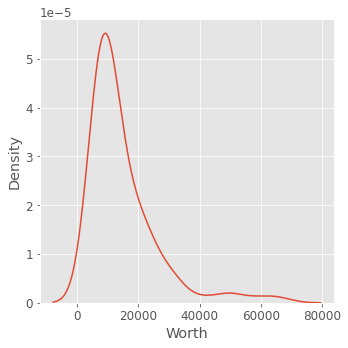

In [12]:
sns.displot(df, x='Worth', kind='kde', bw_adjust=1)

In [13]:
df['Source'].value_counts()

real estate           9
e-commerce            5
batteries             4
chemicals             3
sports apparel        2
                     ..
lithium batteries     1
TikTok                1
semiconductors        1
smartphone screens    1
solar inverters       1
Name: Source, Length: 70, dtype: int64

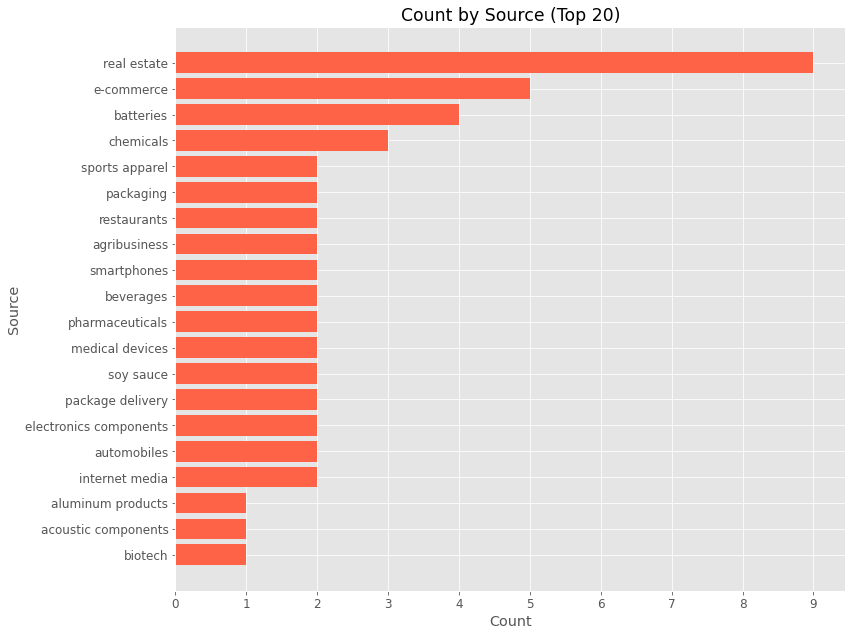

In [14]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
ax.barh(y=df['Source'].value_counts().keys()[:20], width=df['Source'].value_counts().values[:20], color='tomato', align='center')
ax.set(title='Count by Source (Top 20)', xlabel='Count', ylabel='Source')
ax.invert_yaxis()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [15]:
from matplotlib.ticker import FuncFormatter

# helper function to format x-axis
def billion(x, pos):
  return '$%1.1fB' % (x * 1e-3)

format_bill = FuncFormatter(billion)

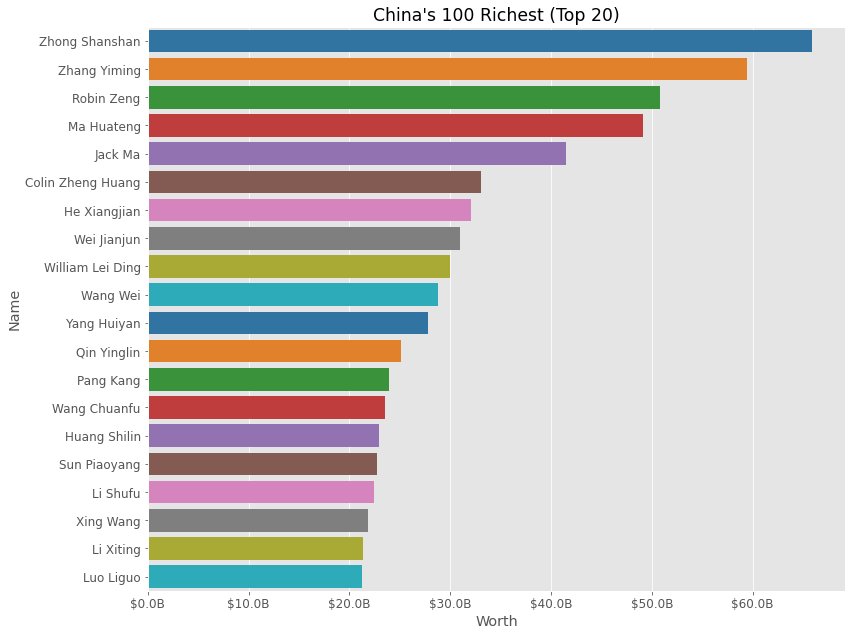

In [16]:
fig, ax = plt.subplots()
sns.barplot(
  data=df[:20],
  x='Worth', y='Name',
  palette='tab10')

ax.set(title="China's 100 Richest (Top 20)", xlabel='Worth', ylabel='Name')
ax.xaxis.set_major_formatter(format_bill)

# Grouping and Aggregation

In [17]:
df.groupby('Source')\
  .agg(np.sum).sort_values(by='Worth', ascending=False)

,Worth
Source,
e-commerce,124400.0
real estate,105210.0
batteries,98600.0
internet media,66100.0
"beverages, pharmaceuticals",65900.0
...,...
apparel,6500.0
"chemicals, spandex",6280.0
electrical equipment,6200.0


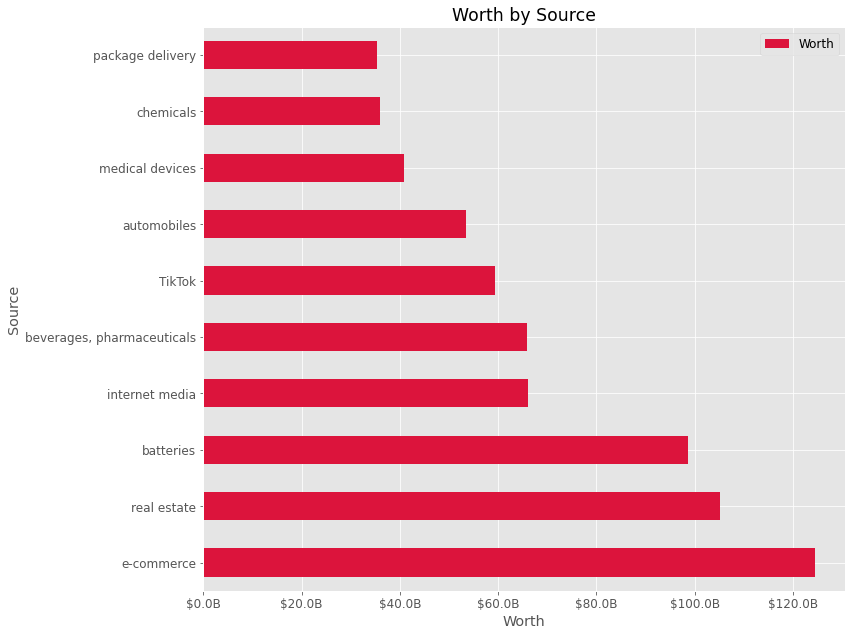

In [18]:
ax = df.groupby('Source')\
  .agg(np.sum).sort_values(by='Worth', ascending=False)[:10]\
  .plot(kind='barh', color='crimson')\

ax.set(title='Worth by Source', xlabel='Worth', ylabel='Source')
ax.xaxis.set_major_formatter(format_bill)